In [1]:
print("all ok")

all ok


In [2]:
import sys, os

# Get project root — one level up from 'research_and_analyst'
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

print("Project root added to path:", project_root)


Project root added to path: c:\Users\tessd\ARRG2026\automated-research-report-generation


In [3]:
from research_and_analyst.utils.model_loader import ModelLoader

In [4]:
import os
from research_and_analyst import PROJECT_ROOT

os.environ["CONFIG_PATH"] = str(
    PROJECT_ROOT / "research_and_analyst" / "config" / "configuration.yaml"
)


In [5]:
model_loader = ModelLoader()

{"timestamp": "2026-01-24T19:17:31.263237Z", "level": "info", "event": "OPENAI_API_KEY loaded from environment"}
{"timestamp": "2026-01-24T19:17:31.264502Z", "level": "warning", "event": "GOOGLE_API_KEY is missing from environment"}
{"timestamp": "2026-01-24T19:17:31.265374Z", "level": "warning", "event": "GROQ_API_KEY is missing from environment"}
{"config_keys": ["embedding_model", "retriever", "llm"], "timestamp": "2026-01-24T19:17:31.268255Z", "level": "info", "event": "YAML config loaded"}


In [6]:
llm=model_loader.load_llm()

{"provider": "openai", "model": "gpt-5.2", "timestamp": "2026-01-24T19:17:34.377381Z", "level": "info", "event": "Loading LLM"}


In [7]:
llm.invoke("hi").content

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


'Hi—what can I help you with today?'

In [8]:
from typing import List
from typing_extensions import TypedDict
from pydantic import BaseModel, Field

#HEALTH

Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
        ),

Analyst(
    name="Dr. Arun Verma",
    role="Ethics Researcher",
    affiliation="WHO",
    description="Explores ethical implications of AI in diagnostics."
),

Analyst(
    name="Ms. Priya Sharma",
    role="Policy Analyst",
    affiliation="Ministry of Health",
    description="Investigates AI policy and compliance frameworks."
)

In [9]:
class Analyst(BaseModel):
    name: str = Field(description="Name of the analyst.")
    role: str = Field(description="Role of the analyst in the context of the topic.")
    affiliation: str = Field(description="Primary affiliation of the analyst.")
    description: str = Field(description="Description of the analyst focus, concerns, and motives.")
    
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nAffiliation: {self.affiliation}\nDescription: {self.description}\n"

In [10]:
Analyst(
    name="Tess Aquino",
    role="genai engineer",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

Analyst(name='Tess Aquino', role='genai engineer', affiliation='AI Research LAB', description='I am genai developer as well as mentor')

In [11]:
analyst = Analyst(
    name="Tess Aquino",
    role="genai engineer",
    affiliation="AI Research LAB",
    description="I am genai developer as well as mentor"
    )

In [12]:
class Perspective(BaseModel):
    analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

In [13]:
analyst.name

'Tess Aquino'

In [14]:
analyst.role

'genai engineer'

In [15]:
analyst.affiliation

'AI Research LAB'

In [16]:
print(analyst.persona)

Name: Tess Aquino
Role: genai engineer
Affiliation: AI Research LAB
Description: I am genai developer as well as mentor



In [17]:
class Perspectives(BaseModel):
    analysts: List[Analyst] = Field(description="Comprehensive list of analysts with their roles and affiliations.")

In [18]:
class GenerateAnalystsState(TypedDict):
    topic: str #research topic
    max_analysts: int # number of analyst
    human_analyst_feedback: str # Human feedback
    analysts: List[Analyst] # Analyst asking questions
    

In [19]:
GenerateAnalystsState(
    topic = "finance",
    max_analysts= 5,
    human_analyst_feedback= "give the real info",  
)

{'topic': 'finance',
 'max_analysts': 5,
 'human_analyst_feedback': 'give the real info'}

In [20]:
Analyst(
        name="Dr. Neha Patel",
        role="Medical Data Scientist",
        affiliation="Stanford Medicine",
        description="Focuses on predictive models for patient outcomes."
    ),

(Analyst(name='Dr. Neha Patel', role='Medical Data Scientist', affiliation='Stanford Medicine', description='Focuses on predictive models for patient outcomes.'),)

In [21]:
analyst_instructions="""You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:

1. First, review the research topic:
{topic}
        
2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: 
        
{human_analyst_feedback}
    
3. Determine the most interesting themes based upon documents and / or feedback above.
                    
4. Pick the top {max_analysts} themes.

5. Assign one analyst to each theme."""

In [22]:
print([analyst_instructions.format(
        topic="education",
        max_analysts=4,
        human_analyst_feedback="please exaplain only on AI"
        
        )] + ["Generate the set of analysts."])

['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']


['You are tasked with creating a set of AI analyst personas. Follow these instructions carefully:\n\n1. First, review the research topic:\neducation\n\n2. Examine any editorial feedback that has been optionally provided to guide creation of the analysts: \n\nplease exaplain only on AI\n\n3. Determine the most interesting themes based upon documents and / or feedback above.\n\n4. Pick the top 4 themes.\n\n5. Assign one analyst to each theme.', 'Generate the set of analysts.']

In [23]:
def create_analyst(state:GenerateAnalystsState):
    """
    it is creating my analyst
    
    """
    topic = state["topic"]
    max_analysts = state["max_analysts"]
    human_analyst_feedback = state.get("human_analyst_feedback","")
    
    structured_llm = llm.with_structured_output(Perspectives)
    
    system_messages = analyst_instructions.format(
        topic=topic,
        max_analysts=max_analysts,
        human_analyst_feedback=human_analyst_feedback
        
        )
    analysts = structured_llm.invoke([SystemMessage(content=system_messages)]+ [HumanMessage(content="Generate the set of analysts.")])
    
    # Write the list of analysis to state
    return {"analysts": analysts.analysts}

In [24]:
from langchain_core.messages import SystemMessage, HumanMessage

In [25]:
create_analyst(
    {'topic': 'health',
    'max_analysts': 2,
    'human_analyst_feedback': 'give the real info'}
    )

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'analysts': [Analyst(name='Dr. Maya Rios', role='Clinical Evidence Analyst (Medicine & Public Health)', affiliation='Academic Medical Center / Evidence-Based Practice Unit', description='Focuses on what high-quality studies actually show about prevention, diagnosis, and treatment. Prioritizes randomized trials, systematic reviews, and guideline-grade evidence; flags common misinformation and overhyped claims. Concerned with safety, contraindications, and real-world effectiveness across diverse populations. Motive: translate complex medical research into accurate, practical recommendations without exaggeration.'),
  Analyst(name='Jordan Kline, MPH', role='Health Policy & Systems Analyst (Access, Cost, Equity)', affiliation='Health Policy Think Tank / Public Health Department', description='Analyzes how health outcomes are shaped by insurance coverage, care delivery models, pricing, regulation, and social determinants of health. Emphasizes measurable impacts on access, affordability, an

In [34]:
def human_feedback(state):
    """ No-op node that should be interrupted on """
    pass

In [35]:
def should_continue(state):
    """ Return the next node to execute """
    human_analyst_feedback = (state.get("human_analyst_feedback") or "").strip()
    if human_analyst_feedback:
        return "create_analyst"

In [36]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage
from langgraph.checkpoint.memory import MemorySaver

In [37]:
from IPython.display import Image, display

## First Workflow

In [38]:
builder = StateGraph(GenerateAnalystsState)

In [39]:
builder.add_node("create_analyst",create_analyst)
builder.add_node("human_feedback", human_feedback)

In [ ]:
# modified from ChatGPT's suggestion
# builder.add_edge(START,"create_analyst")
# builder.add_edge("create_analyst", "human_feedback")
# builder.add_conditional_edges("human_feedback",
#                         should_continue,
#                         ["create_analyst",
#                         END])

In [40]:
builder.add_edge(START,"create_analyst")
builder.add_edge("create_analyst", "human_feedback")
builder.add_conditional_edges(
    "human_feedback",
    should_continue,
    {
        "create_analyst": "create_analyst",
        "end": END,
    },
)


In [41]:
memory = MemorySaver()

In [42]:
graph = builder.compile(interrupt_before= ["human_feedback"],checkpointer= memory)

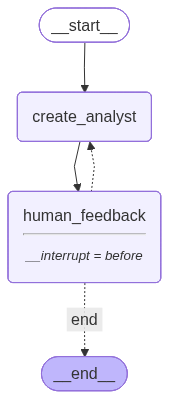

In [43]:
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [44]:
topic = "the benefits of adopting Langgraph as an agent framework"

In [45]:
max_analysts = 4

In [46]:
thread =  {"configurable":{"thread_id":1}}

In [47]:
for event in graph.stream({"topic":topic,
            "max_analysts":max_analysts},
            thread,
            stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Name: Maya Chen
Affiliation: Enterprise AI Platform / Developer Experience
Role: Platform Architect (Agent Orchestration & Reliability)
Description: Focuses on how LangGraph’s graph-based orchestration improves reliability over linear chains: explicit state, controllable execution flow, retries, branching, and human-in-the-loop checkpoints. Evaluates operational benefits like debuggability, observability hooks, determinism where needed, and safer productionization of complex agent behaviors.
--------------------------------------------------
Name: Rafael Singh
Affiliation: Applied AI Product Team / Program Management
Role: Product & Delivery Lead (Time-to-Value and Maintainability)
Description: Assesses whether adopting LangGraph accelerates shipping agentic features: modular graph components, reuse across use-cases, easier iteration on workflows, and clearer ownership boundaries. Concerned with long-term maintainability, onboarding costs, integration effort, and how LangGraph reduces 

In [48]:
state = graph.get_state(thread)

In [49]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Maya Chen', role='Platform Architect (Agent Orchestration & Reliability)', affiliation='Enterprise AI Platform / Developer Experience', description='Focuses on how LangGraph’s graph-based orchestration improves reliability over linear chains: explicit state, controllable execution flow, retries, branching, and human-in-the-loop checkpoints. Evaluates operational benefits like debuggability, observability hooks, determinism where needed, and safer productionization of complex agent behaviors.'), Analyst(name='Rafael Singh', role='Product & Delivery Lead (Time-to-Value and Maintainability)', affiliation='Applied AI Product Team / Program Management', description='Assesses whether adopting LangGraph accelerates shipping agentic features: modular graph components, reuse across use-cases, easier iteration on workflows, and clearer ownership boundaries. Con

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'analysts': [Analyst(name='Maya Chen', role='Agent Architecture & Orchestration Analyst', affiliation='Independent AI Systems Consultant (ex-Platform Engineering)', description='Focuses on how LangGraph’s graph-based execution model improves agent orchestration versus linear chains: explicit state management, branching/merging flows, cycles for iterative reasoning, human-in-the-loop checkpoints, and deterministic control over tool calling. Evaluates maintainability, debuggability, and how well complex multi-step agent workflows can be expressed and evolved over time.'), Analyst(name='Rafael Singh', role='Reliability, Observability & Governance Analyst', affiliation='Enterprise AI Governance Office', description='Assesses production readiness benefits of adopting LangGraph: traceability of agent decisions, audit logs, reproducibility, failure handling, retries, timeouts, and guardrail integration. Concentrates on operational concerns—monitoring, incident response, compliance (PII handling, policy enforcement), and how graph-structured agents enable clearer control points for approvals and risk management.'), Analyst(name='Elena Petrova', role='Performance, Cost & Scaling Analyst', affiliation='Applied ML Infrastructure Team', description='Analyzes runtime efficiency and scaling implications: parallel node execution, caching/memoization opportunities, controlling token/tool costs through structured flow, and minimizing redundant calls. Compares LangGraph’s overhead and concurrency model to alternatives, and estimates cost/performance tradeoffs for high-throughput agent services and batch workloads.'), Analyst(name='Jordan Okafor', role='Developer Experience & Ecosystem/Integration Analyst', affiliation='Developer Productivity (Internal Tools)', description='Examines adoption drivers for engineering teams: learning curve, API ergonomics, testing patterns, local iteration speed, and integration with LangChain ecosystem, model providers, and tool interfaces. Evaluates how LangGraph supports collaborative development (modular nodes, reusable subgraphs), CI-friendly validation, and migration paths from existing chain/agent implementations.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f950d-ae94-6086-8001-2e7e666e3d41'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-24T18:16:51.390477+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f950d-5e48-6c8b-8000-bcdc0dcea869'}}, tasks=(PregelTask(id='6964e1dc-5900-701f-7f48-70efac0db27b', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [50]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'analysts': [Analyst(name='Maya Chen', role='Platform Architect (Agent Orchestration & Reliability)', affiliation='Enterprise AI Platform / Developer Experience', description='Focuses on how LangGraph’s graph-based orchestration improves reliability over linear chains: explicit state, controllable execution flow, retries, branching, and human-in-the-loop checkpoints. Evaluates operational benefits like debuggability, observability hooks, determinism where needed, and safer productionization of complex agent behaviors.'),
  Analyst(name='Rafael Singh', role='Product & Delivery Lead (Time-to-Value and Maintainability)', affiliation='Applied AI Product Team / Program Management', description='Assesses whether adopting LangGraph accelerates shipping agentic features: modular graph components, reuse across use-cases, easier iteration on workflows, and clearer ownership boundaries. Concerned with long-

In [51]:
state.next

('human_feedback',)

In [52]:
memory.storage.items()

dict_items([('1', defaultdict(<class 'dict'>, {'': {'1f0f959e-1622-6cb2-bfff-7c853720b0b8': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2026-01-24T19:21:27.719851+00:00\xa2id\xd9$1f0f959e-1622-6cb2-bfff-7c853720b0b8\xb0channel_versions\x81\xa9__start__\xd9300000000000000000000000000000001.0.8430583517127943\xadversions_seen\x81\xa9__input__\x80\xb0updated_channels\x91\xa9__start__'), ('msgpack', b'\x83\xa6source\xa5input\xa4step\xff\xa7parents\x80'), None), '1f0f959e-1624-6e4b-8000-f336c5ef7856': (('msgpack', b'\x86\xa1v\x04\xa2ts\xd9 2026-01-24T19:21:27.720711+00:00\xa2id\xd9$1f0f959e-1624-6e4b-8000-f336c5ef7856\xb0channel_versions\x84\xa9__start__\xd9300000000000000000000000000000002.0.7264805268563789\xa5topic\xd9300000000000000000000000000000002.0.7264805268563789\xacmax_analysts\xd9300000000000000000000000000000002.0.7264805268563789\xb8branch:to:create_analyst\xd9300000000000000000000000000000002.0.7264805268563789\xadversions_seen\x82\xa9__input__\x80\xa9__start__\x81\xa9__start__\xd

In [53]:
state.config

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0f959e-6a87-6530-8001-7a5a40ef0895'}}

In [54]:
graph.update_state(thread,
               {"human_analyst_feedback":"add something from the startup perspective and focus on the latest enterprise application"},as_node="human_feedback"
                  )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0f959f-5e5e-6153-8002-db14ac817b9d'}}

In [55]:
for event in graph.stream({"topic":topic,
            "max_analysts":max_analysts},
            thread,
            stream_mode= "values"):
    analysts = event.get('analysts', '')
    
    if analysts:
        for analyst in analysts:
            print(f"Name: {analyst.name}")
            print(f"Affiliation: {analyst.affiliation}")
            print(f"Role: {analyst.role}")
            print(f"Description: {analyst.description}")
            print("-" * 50)  

Name: Maya Chen
Affiliation: Enterprise AI Platform / Developer Experience
Role: Platform Architect (Agent Orchestration & Reliability)
Description: Focuses on how LangGraph’s graph-based orchestration improves reliability over linear chains: explicit state, controllable execution flow, retries, branching, and human-in-the-loop checkpoints. Evaluates operational benefits like debuggability, observability hooks, determinism where needed, and safer productionization of complex agent behaviors.
--------------------------------------------------
Name: Rafael Singh
Affiliation: Applied AI Product Team / Program Management
Role: Product & Delivery Lead (Time-to-Value and Maintainability)
Description: Assesses whether adopting LangGraph accelerates shipping agentic features: modular graph components, reuse across use-cases, easier iteration on workflows, and clearer ownership boundaries. Concerned with long-term maintainability, onboarding costs, integration effort, and how LangGraph reduces 

HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Name: Maya Chen
Affiliation: Global Systems Integrator (Enterprise AI Practice)
Role: Enterprise Agent Architecture Analyst
Description: Focuses on the benefits of adopting LangGraph for large-scale, production agent systems: deterministic stateful workflows, controllable routing, human-in-the-loop gates, and audit-ready execution traces. Evaluates how LangGraph improves reliability, observability, governance, and integration with existing enterprise platforms (IAM, data catalogs, ticketing, SIEM), with an emphasis on the latest enterprise applications like ITSM copilots, RAG + tools orchestration, and multi-agent process automation.
--------------------------------------------------
Name: Ravi Nandakumar
Affiliation: Early-Stage Venture Studio
Role: Startup Product & GTM Analyst (Agent Frameworks)
Description: Assesses LangGraph adoption from a startup perspective: time-to-market, developer experience, iteration speed, and long-term maintenance costs. Tracks how LangGraph enables star

In [56]:
state = graph.get_state(thread)

In [57]:
state

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application', 'analysts': [Analyst(name='Maya Chen', role='Enterprise Agent Architecture Analyst', affiliation='Global Systems Integrator (Enterprise AI Practice)', description='Focuses on the benefits of adopting LangGraph for large-scale, production agent systems: deterministic stateful workflows, controllable routing, human-in-the-loop gates, and audit-ready execution traces. Evaluates how LangGraph improves reliability, observability, governance, and integration with existing enterprise platforms (IAM, data catalogs, ticketing, SIEM), with an emphasis on the latest enterprise applications like ITSM copilots, RAG + tools orchestration, and multi-agent process automation.'), Analyst(name='Ravi Nandakumar', role='Startup Product & GTM Analyst (Agent Frameworks)', affiliatio

StateSnapshot(values={'topic': 'the benefits of adopting Langgraph as an agent framework', 'max_analysts': 4, 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application', 'analysts': [Analyst(name='Maya Chen', role='Enterprise AI Platform Strategist', affiliation='Fortune 100 Data & AI Office', description='Evaluates LangGraph as a standardized agent framework for large organizations: governance, security boundaries, auditability, reproducibility, and integration with existing platform stacks (Kubernetes, service meshes, secrets management, IAM). Focuses on how LangGraph’s graph-based orchestration improves reliability, controllability, and compliance for enterprise-grade agentic workflows and how it reduces platform fragmentation across teams.'), Analyst(name='Ravi Iyer', role='Applied Agent Architect (Latest Enterprise Applications)', affiliation='Global Systems Integrator (AI Delivery Practice)', description='Focuses on current, high-impact enterprise use cases (agentic RAG over internal knowledge, IT ops copilots, customer support resolution agents, finance/contract review, security triage). Assesses benefits of LangGraph for production patterns—human-in-the-loop checkpoints, multi-step tool calling, long-running workflows, state persistence, deterministic routing, and resilience—mapped to measurable outcomes like resolution time, deflection, and accuracy.'), Analyst(name='Elena García', role='Startup CTO / Product-Led Engineering Analyst', affiliation='B2B SaaS Startup (Series A)', description='Analyzes LangGraph from a startup adoption perspective: speed to MVP, developer experience, iteration velocity, cost control, and path from prototype to production without a rewrite. Prioritizes pragmatic advantages—clear workflow modeling, testability, observability hooks, and maintainability—while weighing tradeoffs like learning curve, ecosystem lock-in, and how LangGraph can differentiate product features (custom agent flows, customer-specific policies, rapid experimentation).'), Analyst(name='Noah Stein', role='Reliability & MLOps/LLMOps Analyst', affiliation='Cloud Provider AI Reliability Engineering', description='Concentrates on operational benefits of LangGraph: debugging complex agent behavior, tracing/telemetry, evaluation harnesses, regression testing, versioning of prompts/tools, and incident response. Assesses how graph structure and explicit state management can reduce stochastic failures, enable safer rollouts (canaries, feature flags), support SLA/SLO targets, and improve run cost predictability through caching, retries, and bounded execution paths.')]}, next=('human_feedback',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f9512-63b9-673d-8005-1406c6c56bc9'}}, metadata={'source': 'loop', 'step': 5, 'parents': {}}, created_at='2026-01-24T18:18:57.759212+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f9511-f11e-6b00-8004-217295aaff15'}}, tasks=(PregelTask(id='ac4baae9-74bc-9ed9-6f47-6cddc5f10733', name='human_feedback', path=('__pregel_pull', 'human_feedback'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [58]:
state.next

('human_feedback',)

In [59]:
state.values

{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application',
 'analysts': [Analyst(name='Maya Chen', role='Enterprise Agent Architecture Analyst', affiliation='Global Systems Integrator (Enterprise AI Practice)', description='Focuses on the benefits of adopting LangGraph for large-scale, production agent systems: deterministic stateful workflows, controllable routing, human-in-the-loop gates, and audit-ready execution traces. Evaluates how LangGraph improves reliability, observability, governance, and integration with existing enterprise platforms (IAM, data catalogs, ticketing, SIEM), with an emphasis on the latest enterprise applications like ITSM copilots, RAG + tools orchestration, and multi-agent process automation.'),
  Analyst(name='Ravi Nandakumar', role='Startup Product & GTM Analyst (Agent Frameworks)', affiliation='Early-Stage V

In [60]:
# If we are satisfied, then we simply supply no feedback
further_feedack = ""

In [61]:
# 1) Get the latest state (you're paused at 'human_feedback')
state = graph.get_state(thread)

# 2) Use the exact config from that state (it already has thread_id, checkpoint_ns, checkpoint_id)
cfg = state.config

In [ ]:
# replaced this with next cell, since it is crashing
# # 3) Update feedback at the 'human_feedback' node
# #    Tip: if your TypedDict says `human_analyst_feedback: str`, prefer "" (empty string) over None
# graph.update_state(cfg, {"human_analyst_feedback": ""}, as_node="human_feedback")

KeyError: None

In [63]:
graph.update_state(
    cfg,
    {"human_analyst_feedback": "Add startup POV + latest enterprise use cases"},
    as_node="human_feedback",
)
graph.invoke(None, cfg)


HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


{'topic': 'the benefits of adopting Langgraph as an agent framework',
 'max_analysts': 4,
 'human_analyst_feedback': 'add something from the startup perspective and focus on the latest enterprise application',
 'analysts': [Analyst(name='Maya Chen', role='Enterprise Agent Platform Architect', affiliation='Fortune 100 AI Platform Engineering', description='Evaluates LangGraph as an enterprise-grade agent framework: governance, security (RBAC, data boundaries), deployment patterns (VPC/on-prem), observability, audit trails, reproducibility, and integration with existing LLM gateways, secrets managers, and SIEM. Focuses on reducing operational risk while enabling scalable multi-agent workflows across business units.'),
  Analyst(name='Ravi Patel', role='Startup CTO & Product-led Growth Advisor', affiliation='Seed-to-Series B B2B SaaS', description='Assesses LangGraph from a startup perspective: fastest path to production, developer velocity, iteration speed, and cost control. Compares bui

In [64]:
# 4) Verify it moved to END
final_state = graph.get_state(thread)
print(final_state.next)  # should be (END,)

('human_feedback',)


In [ ]:
config = {"configurable": {"thread_id": "1"}}

result = graph.invoke(
    {
        "topic": "the benefits of adopting Langgraph as an agent framework",
        "max_analysts": 4,
        "human_analyst_feedback": "add something from the startup perspective and focus on the latest enterprise application",
        # plus whatever else your state schema requires...
    },
    config=config,
)
